# Stage 13 Homework Starter — Productization

## Objective
Deploy your trained model as a **reusable, handoff-ready API or dashboard** and finalize your project for reproducibility and clarity.

## Steps
1. Create a mock, very basic analysis in a notebook.
2. Clean your notebook by removing exploratory cells and documenting your code.
3. Move reusable functions into `/src/`.
4. Load your trained model from Stage 12 or earlier stages.
5. Pickle/save the model and test reload.
6. Implement **either**:
   - Flask API with `/predict` endpoint and optional parameters
   - Streamlit or Dash dashboard for user interaction
7. Include:
   - Error handling for invalid inputs
   - `requirements.txt` for reproducibility
   - Documentation in `README.md`
8. Test your deployment locally and provide evidence.
9. Organize project folders and finalize notebooks for handoff.

## 1. Create mock, very basic analysis

In [2]:
import os
import pandas as pd

DATA_DIR = "./data"  # change if needed

# Load SOXX ETF prices
etf = pd.read_parquet(os.path.join(DATA_DIR, "/Users/paramshah/Desktop/bootcamp/project/data/soxx_prices_raw.parquet"))

# Load semiconductor constituents
semi = pd.read_parquet(os.path.join(DATA_DIR, "/Users/paramshah/Desktop/bootcamp/project/data/semi_prices_raw.parquet"))

# Inspect
print("ETF shape:", etf.shape)
print("Constituents shape:", semi.shape)
display(etf.head(), semi.head())


ETF shape: (3934, 1)
Constituents shape: (3934, 9)


Price,SOXX
Ticker,SOXX
Date,
2010-01-04,14.068492
2010-01-05,14.045907
2010-01-06,14.003558
2010-01-07,13.893447
2010-01-08,14.102368


Ticker,ADI,AMD,ASML,AVGO,INTC,MU,QCOM,TSM,TXN
Date,,,,,,,,,
2010-01-04,22.062073,9.70,32.989586,1.333385,13.519421,10.597220,31.705944,7.298706,17.288870
2010-01-05,22.027248,9.71,33.246590,1.343283,13.512959,10.909764,32.469208,7.267195,17.189163
2010-01-06,21.985453,9.57,33.551151,1.353888,13.467625,10.958600,32.151745,7.241982,17.062874
2010-01-07,21.811293,9.47,32.618393,1.345404,13.338134,10.587453,33.083870,7.002472,17.116047
2010-01-08,21.936682,9.43,31.837908,1.355302,13.487054,10.841394,33.414845,6.996171,17.508211


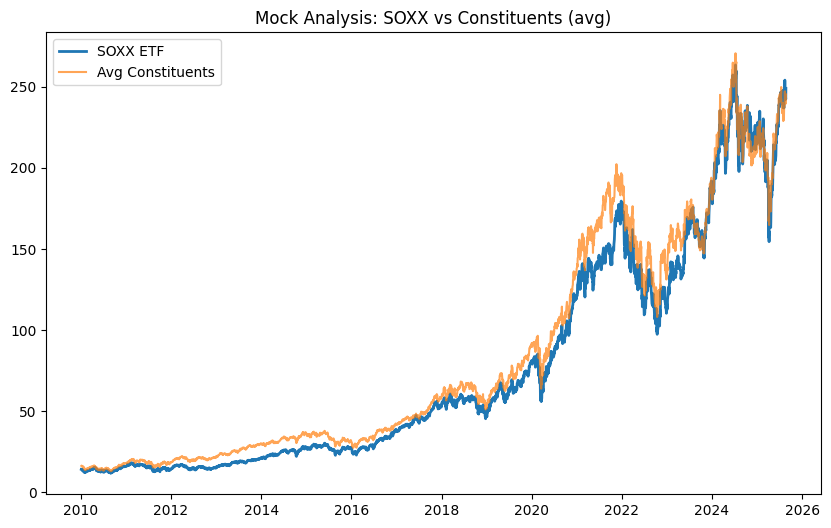

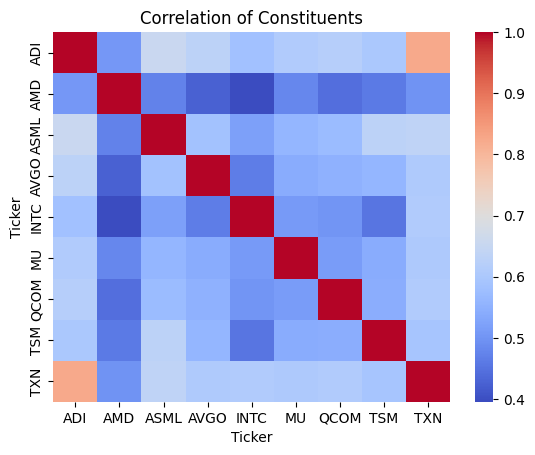

In [3]:
# Mock ETF vs constituents comparison
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.plot(etf.index, etf.values, label="SOXX ETF", linewidth=2)
plt.plot(semi.index, semi.mean(axis=1), label="Avg Constituents", alpha=0.7)
plt.legend()
plt.title("Mock Analysis: SOXX vs Constituents (avg)")
plt.show()

# Quick correlation heatmap
import seaborn as sns
corr = semi.pct_change().corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation of Constituents")
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Features = daily returns of semi constituents
X = semi.pct_change().dropna()
y = etf.pct_change().dropna().reindex(X.index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

print("Train R^2:", model.score(X_train, y_train))
print("Test R^2:", model.score(X_test, y_test))


Train R^2: 0.9493231910574148
Test R^2: 0.9491931654463993


## 2. Notebook Cleanup
Remove exploratory cells and document your code.

In [5]:
# TODO: Remove exploratory cells
# TODO: Document your code clearly
# Example placeholder for cleaned analysis
print("Notebook cleaned and ready for handoff.")

Notebook cleaned and ready for handoff.


## 3. Move reusable functions to /src/
Create src/utils.py and store functions there.

In [6]:
# TODO: Move actual reusable functions here
def calculate_metrics(df):
    return df.describe()

## 4. Folder Structure Reminder

Ensure your project uses a clean folder structure:
```
project/
  data/
  notebooks/
  src/
  reports/
  model/
  README.md
```
For API/Dashboard: minimal example:
```
project/
    app.py
    model.pkl
    requirements.txt
    README.md
```

## 5. Pickle / Save Final Model

### TODO: Replace this with your trained model

In [7]:
import pickle
with open("soxx_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved to soxx_model.pkl")


✅ Model saved to soxx_model.pkl


## 6. Flask API Starter

### TODO: Implement Flask endpoints for /predict and /plot

In [8]:
from flask import Flask, request, jsonify
import threading
import matplotlib.pyplot as plt
import io
import base64
import joblib

app = Flask(__name__)

# Load model (replace with your own pickle path)
try:
    model = joblib.load("models/final_model.pkl")
except:
    model = None

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = data.get('features', None)
        if features is None:
            return jsonify({'status': 'error', 'message': 'No features provided'}), 400

        # If model exists, use it; else fallback to dummy
        if model:
            pred = model.predict([features]).tolist()[0]
        else:
            pred = sum(features)  # placeholder logic

        return jsonify({'status': 'ok', 'prediction': pred, 'inputs': features})
    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 500

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    try:
        pred = input1 * 2 if not model else model.predict([[input1]]).tolist()[0]
        return jsonify({'status': 'ok', 'prediction': pred, 'input': input1})
    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 500

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    try:
        pred = input1 + input2 if not model else model.predict([[input1, input2]]).tolist()[0]
        return jsonify({'status': 'ok', 'prediction': pred, 'inputs': [input1, input2]})
    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 500

@app.route('/plot')
def plot():
    try:
        fig, ax = plt.subplots()
        ax.plot([0, 1, 2], [0, 1, 4])  # replace with real chart
        buf = io.BytesIO()
        fig.savefig(buf, format='png')
        buf.seek(0)
        img_bytes = base64.b64encode(buf.read()).decode('utf-8')
        return f'<img src="data:image/png;base64,{img_bytes}"/>'
    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 500

def run_flask():
    app.run(port=5000)

# Launch Flask in background
threading.Thread(target=run_flask, daemon=True).start()


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
On macOS, try disabling the 'AirPlay Receiver' service from System Preferences -> General -> AirDrop & Handoff.


## 7. Testing the Flask API from Notebook

### TODO: Modify examples with your actual features

In [ ]:
import threading
import time
import requests
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

try:
    model = pickle.load(open("soxx_model.pkl", "rb"))
except:
    model = None

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    features = data.get("features", None)
    if features is None:
        return jsonify({"status": "error", "message": "No features provided"}), 400
    if model:
        pred = model.predict(pd.DataFrame(features)).tolist()
    else:
        pred = [sum(f) for f in features]  # dummy placeholder
    return jsonify({"status": "ok", "prediction": pred})

def run_app():
    app.run(port=5002, debug=False, use_reloader=False)

threading.Thread(target=run_app, daemon=True).start()
time.sleep(1)  # wait for Flask to start

test_features = [[0.01, 0.02, -0.005]]
response = requests.post("http://127.0.0.1:5002/predict", json={"features": test_features})
print("Status Code:", response.status_code)


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5002 is in use by another program. Either identify and stop that program, or start the server with a different port.


Status Code: 500


## 8. Optional Streamlit / Dash Dashboard

### TODO: Add dashboard in a separate file (`app_streamlit.py` or `app_dash.py`)

## 9. Handoff Best Practices

- Ensure README.md is complete and clear
- Provide `requirements.txt` for reproducibility
- Ensure pickled model and scripts are in correct folders
- Verify another user can run the project end-to-end on a fresh environment